In [30]:
import pandas as pd

# Dépendances traitement de texte
import spacy
import nltk
nlp = spacy.load("fr_core_news_sm")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('french')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\proui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
body=pd.read_csv('data.csv')
body.head()

,Unnamed: 0,Nom,Mouvement,summary,sum_lem,mvm_label
0,0,William S. Burroughs,Beat Generation,William Seward Burroughs (/ˈwɪljəm ˈsuɚd ˈbɜɹo...,William Seward Burroughs ˈsuɚd dit William Bur...,0
1,1,Lucien Carr,Beat Generation,"Lucien Carr, né le 1er mars 1925 à New York et...",Lucien Carr naître premier mars 1925 New York ...,0
2,2,Carolyn Cassady,Beat Generation,"Carolyn Cassady, née Carolyn Robinson le 28 av...",Carolyn Cassady naître Carolyn Robinson 28 avr...,0
3,3,John Clellon Holmes,Beat Generation,"John Clellon Holmes est un romancier, essayist...",John Clellon holme romancier essayiste poète a...,0
4,4,Gregory Corso,Beat Generation,"Gregory Nunzio Corso (New York, 26 mars 1930 -...",gregory Nunzio Corso New York 26 mars 1930 Min...,0


### SVM

In [32]:
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorisation

In [33]:
corpus = body['sum_lem']

#vectorizer=CountVectorizer(ngram_range=(1,1))
vectorizer=TfidfVectorizer()

X=vectorizer.fit_transform(corpus)  #apprentissage du vocabulaire 

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(body['sum_lem'],body['mvm_label'],shuffle=True, test_size = 0.35)

xtrain_tfidf=vectorizer.transform(xtrain)
xtest_tfidf=vectorizer.transform(xtest)

In [62]:
# SVM Classifier
clf = svm.SVC() # Linear Kernel

# Entraîne le modèle avec les données train
clf.fit(xtrain_tfidf, ytrain)

# Prédiction d'une réponse pour les données test
ypred = clf.predict(xtest_tfidf)

In [63]:
print('Accuracy: ', metrics.accuracy_score(ytest, ypred))

Accuracy:  0.40217391304347827


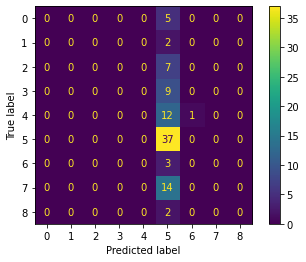

In [64]:
import sklearn
import matplotlib.pyplot as plt
conf=sklearn.metrics.confusion_matrix(ytest, ypred)
disp=sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()

In [29]:
#mvm_label
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

test=['moderne','ancien','old']
X=LE.fit_transform(test)
print(X)

[1 0 2]
